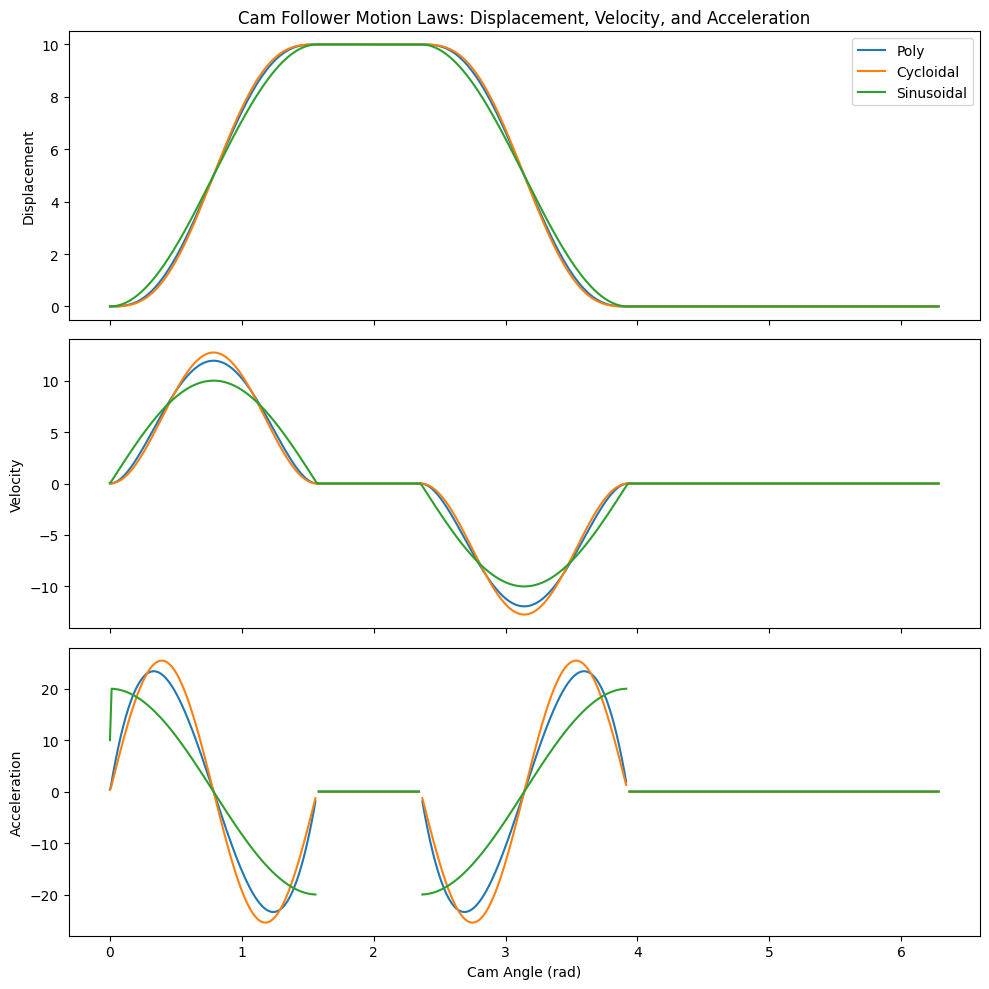

In [11]:
import numpy as np
import matplotlib.pyplot as plt

# PARAMETERS
L = 10                              # Total lift
theta_total = 2 * np.pi            # Full cam rotation (0 to 2π)
N = 1000                           # Total number of points

# Phase durations
theta_ri = np.pi / 2               # Rise over 90°
theta_dw = np.pi / 4               # Dwell for 45°
theta_fall = np.pi / 2             # Fall over 90°
theta_dw2 = theta_total - (theta_ri + theta_dw + theta_fall)

# Phase divisions (angle arrays)
num_rise = N // 4
num_dwell = N // 8
num_fall = N // 4
num_dwell2 = N - (num_rise + num_dwell + num_fall)

theta_rise = np.linspace(0, theta_ri, num_rise)
theta_dwell = np.linspace(theta_ri, theta_ri + theta_dw, num_dwell)
theta_fall = np.linspace(theta_ri + theta_dw, theta_ri + theta_dw + theta_fall, num_fall)
start_theta_dwell2 = theta_fall[-1]
theta_dwell2 = np.linspace(start_theta_dwell2, theta_total, num_dwell2)

def normalize(t, t0, tf):
    return (t - t0) / (tf - t0)

def poly_profile(t, t0, tf, L):
    x = normalize(t, t0, tf)
    return L * (10 * x**3 - 15 * x**4 + 6 * x**5)

def cycloidal_profile(t, t0, tf, L):
    x = normalize(t, t0, tf)
    return L * (x - (1/(2*np.pi)) * np.sin(2*np.pi * x))

def sinusoidal_profile(t, t0, tf, L):
    x = normalize(t, t0, tf)
    return (L / 2) * (1 - np.cos(np.pi * x))

def velocity(y, theta):
    return np.gradient(y, theta)

def acceleration(y, theta):
    return np.gradient(np.gradient(y, theta), theta)

# Generate profiles
profiles = {}
for law in ['poly', 'cycloidal', 'sinusoidal']:
    if law == 'poly':
        y_rise = poly_profile(theta_rise, 0, theta_ri, L)
        y_fall = L - poly_profile(theta_fall, theta_fall[0], theta_fall[-1], L)
    elif law == 'cycloidal':
        y_rise = cycloidal_profile(theta_rise, 0, theta_ri, L)
        y_fall = L - cycloidal_profile(theta_fall, theta_fall[0], theta_fall[-1], L)
    elif law == 'sinusoidal':
        y_rise = sinusoidal_profile(theta_rise, 0, theta_ri, L)
        y_fall = L - sinusoidal_profile(theta_fall, theta_fall[0], theta_fall[-1], L)

    y_dwell = np.ones_like(theta_dwell) * L
    y_dwell2 = np.zeros_like(theta_dwell2)

    theta_full = np.concatenate([theta_rise, theta_dwell, theta_fall, theta_dwell2])
    y_full = np.concatenate([y_rise, y_dwell, y_fall, y_dwell2])
    v_full = velocity(y_full, theta_full)
    a_full = acceleration(y_full, theta_full)

    profiles[law] = {
        'theta': theta_full,
        'displacement': y_full,
        'velocity': v_full,
        'acceleration': a_full
    }

# Plotting
fig, axs = plt.subplots(3, 1, figsize=(10, 10), sharex=True)
for law in profiles:
    theta = profiles[law]['theta']
    axs[0].plot(theta, profiles[law]['displacement'], label=law.title())
    axs[1].plot(theta, profiles[law]['velocity'], label=law.title())
    axs[2].plot(theta, profiles[law]['acceleration'], label=law.title())

axs[0].set_ylabel('Displacement')
axs[1].set_ylabel('Velocity')
axs[2].set_ylabel('Acceleration')
axs[2].set_xlabel('Cam Angle (rad)')
axs[0].legend()
axs[0].set_title("Cam Follower Motion Laws: Displacement, Velocity, and Acceleration")

plt.tight_layout()
plt.show()
